In [1]:
# Melhor Curta Animado para TV

import requests
from bs4 import BeautifulSoup

planilha = []

links_episodios = ["https://www.imdb.com/title/tt9788486/?ref_=ttep_ep3",
                   "https://www.imdb.com/title/tt8530658/?ref_=ttep_ep16",
                   "https://www.imdb.com/title/tt8260854/?ref_=ttep_ep20",
                   "https://www.imdb.com/title/tt8580186/?ref_=ttep_ep23",
                   "https://www.imdb.com/title/tt9659582/?ref_=ttep_ep19"]

for link in links_episodios: # Pega cada link da lista de links para fazer a requisição
    requisicao = requests.get(link)

    sopa = BeautifulSoup(requisicao.content, "html.parser") # Dados brutos da página inteira
    
    # Conjunto que acha o nome da série
    acha_nome = sopa.find("div", {"class": "titleParent"})
    nome_serie = acha_nome.find("a").text

    # Conjunto que acha a temporada e o número do episódio
    acha_temp_episodio = sopa.find("div", {"class": "bp_description"})
    temp_episodio = acha_temp_episodio.find("div", {"class": "bp_heading"}).text.strip() # Temporada e episódio dentro da mesma tag separados por |
    lista = temp_episodio.split(" | ") # Comando split e cria uma lista com os dois itens
    temporada = lista[0] # Primeiro item da lista corresponde à temporada
    episodio = lista[1] # Segundo item da lista corresponde ao episódio
    temporada = temporada.replace("Season ", "") # Limpa para deixar só o número
    episodio = episodio.replace("Episode", "") # Limpa para deixar só o número
    
    # Conjunto que acha o nome do episódio
    
    acha_nome_episodio = sopa.find("div", {"class": "title_wrapper"}) # Div com o nome do episódio
    nome_episodio = acha_nome_episodio.find("h1").text.strip() # Limpa só o nome do episódio

    # Conjunto que acha a avaliação do episódio
    avaliacao = sopa.find("div", {"class": "imdbRating"})
    nota = avaliacao.find("span", {"itemprop": "ratingValue"}).text.strip()
    votos = avaliacao.find("span", {"itemprop": "ratingCount"}).text.strip()
    votos = votos.replace(",", "") # Limpa para poder converter para inteiro
    
    dicionario = {"serie": nome_serie, "temporada": temporada, "episodio": episodio, "nome_episodio": nome_episodio, "nota": float(nota), "votos": int(votos)} # Monta o dicionário
    planilha.append(dicionario) # Adiciona planilha ao dicionário
    
print(planilha)

[{'serie': 'Amor, Morte & Robos', 'temporada': '1', 'episodio': ' 3', 'nome_episodio': 'The Witness', 'nota': 7.8, 'votos': 10360}, {'serie': 'Frango Robô', 'temporada': '9', 'episodio': ' 15', 'nome_episodio': 'Why Is It Wet?', 'nota': 7.6, 'votos': 27}, {'serie': 'Bob Esponja Calça Quadrada', 'temporada': '11', 'episodio': ' 20', 'nome_episodio': 'Plankton Paranoia/Library Cards', 'nota': 5.7, 'votos': 97}, {'serie': 'Steven Universo', 'temporada': '5', 'episodio': ' 23', 'nome_episodio': 'Reunited', 'nota': 9.6, 'votos': 855}, {'serie': 'Os Jovens Titãs em Ação!', 'temporada': '5', 'episodio': ' 19', 'nome_episodio': 'Nostalgia is Not A Substitute For An Actual Story', 'nota': 5.8, 'votos': 12}]


In [2]:
import pandas

df = pandas.DataFrame(planilha)
df.to_csv("curta-animado-tv.csv", sep = ";", encoding = "utf-8")
df.sort_values(by = "nota", ascending = False)

,serie,temporada,episodio,nome_episodio,nota,votos
3,Steven Universo,5,23,Reunited,9.6,855
0,"Amor, Morte & Robos",1,3,The Witness,7.8,10360
1,Frango Robô,9,15,Why Is It Wet?,7.6,27
4,Os Jovens Titãs em Ação!,5,19,Nostalgia is Not A Substitute For An Actual Story,5.8,12
2,Bob Esponja Calça Quadrada,11,20,Plankton Paranoia/Library Cards,5.7,97


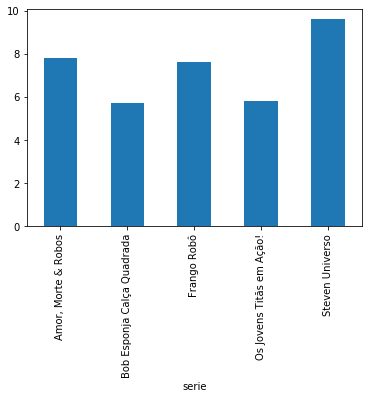

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

agrupamento1 = df.groupby("serie")["nota"].mean()
agrupamento1.plot.bar()

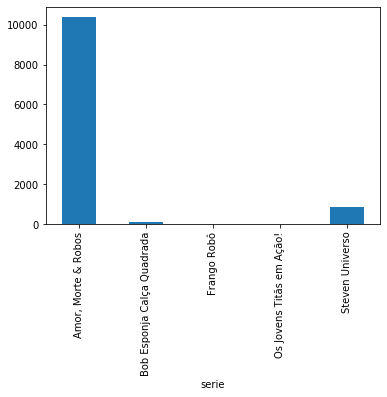

In [4]:
agrupamento2 = df.groupby("serie")["votos"].sum()
agrupamento2.plot.bar()